## IMPORTING LIB

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
customer_data = pd.read_csv(r"C:\Users\kantr\Downloads\archive\Churn_Modelling.csv")


## EXPLORING_DATA

In [13]:
customer_data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [28]:
customer_data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [14]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
# Replace inf values with NaN
customer_data.replace([float('inf'), float('-inf')], pd.NA, inplace=True)


## DATA_VISUALIZATION 

<Axes: >

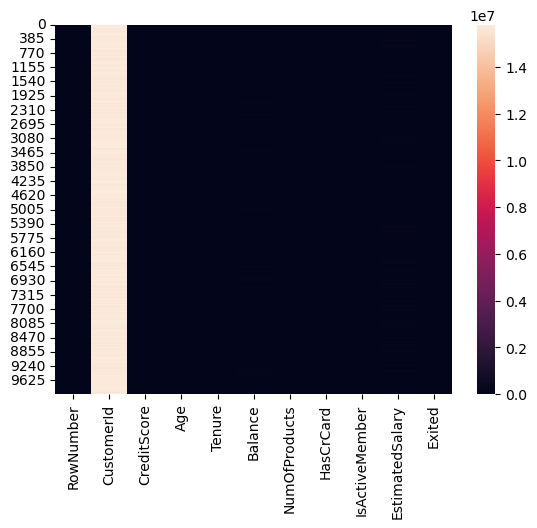

In [21]:
sns.heatmap(customer_data.drop(["Surname","Geography","Gender"],axis=1))

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 

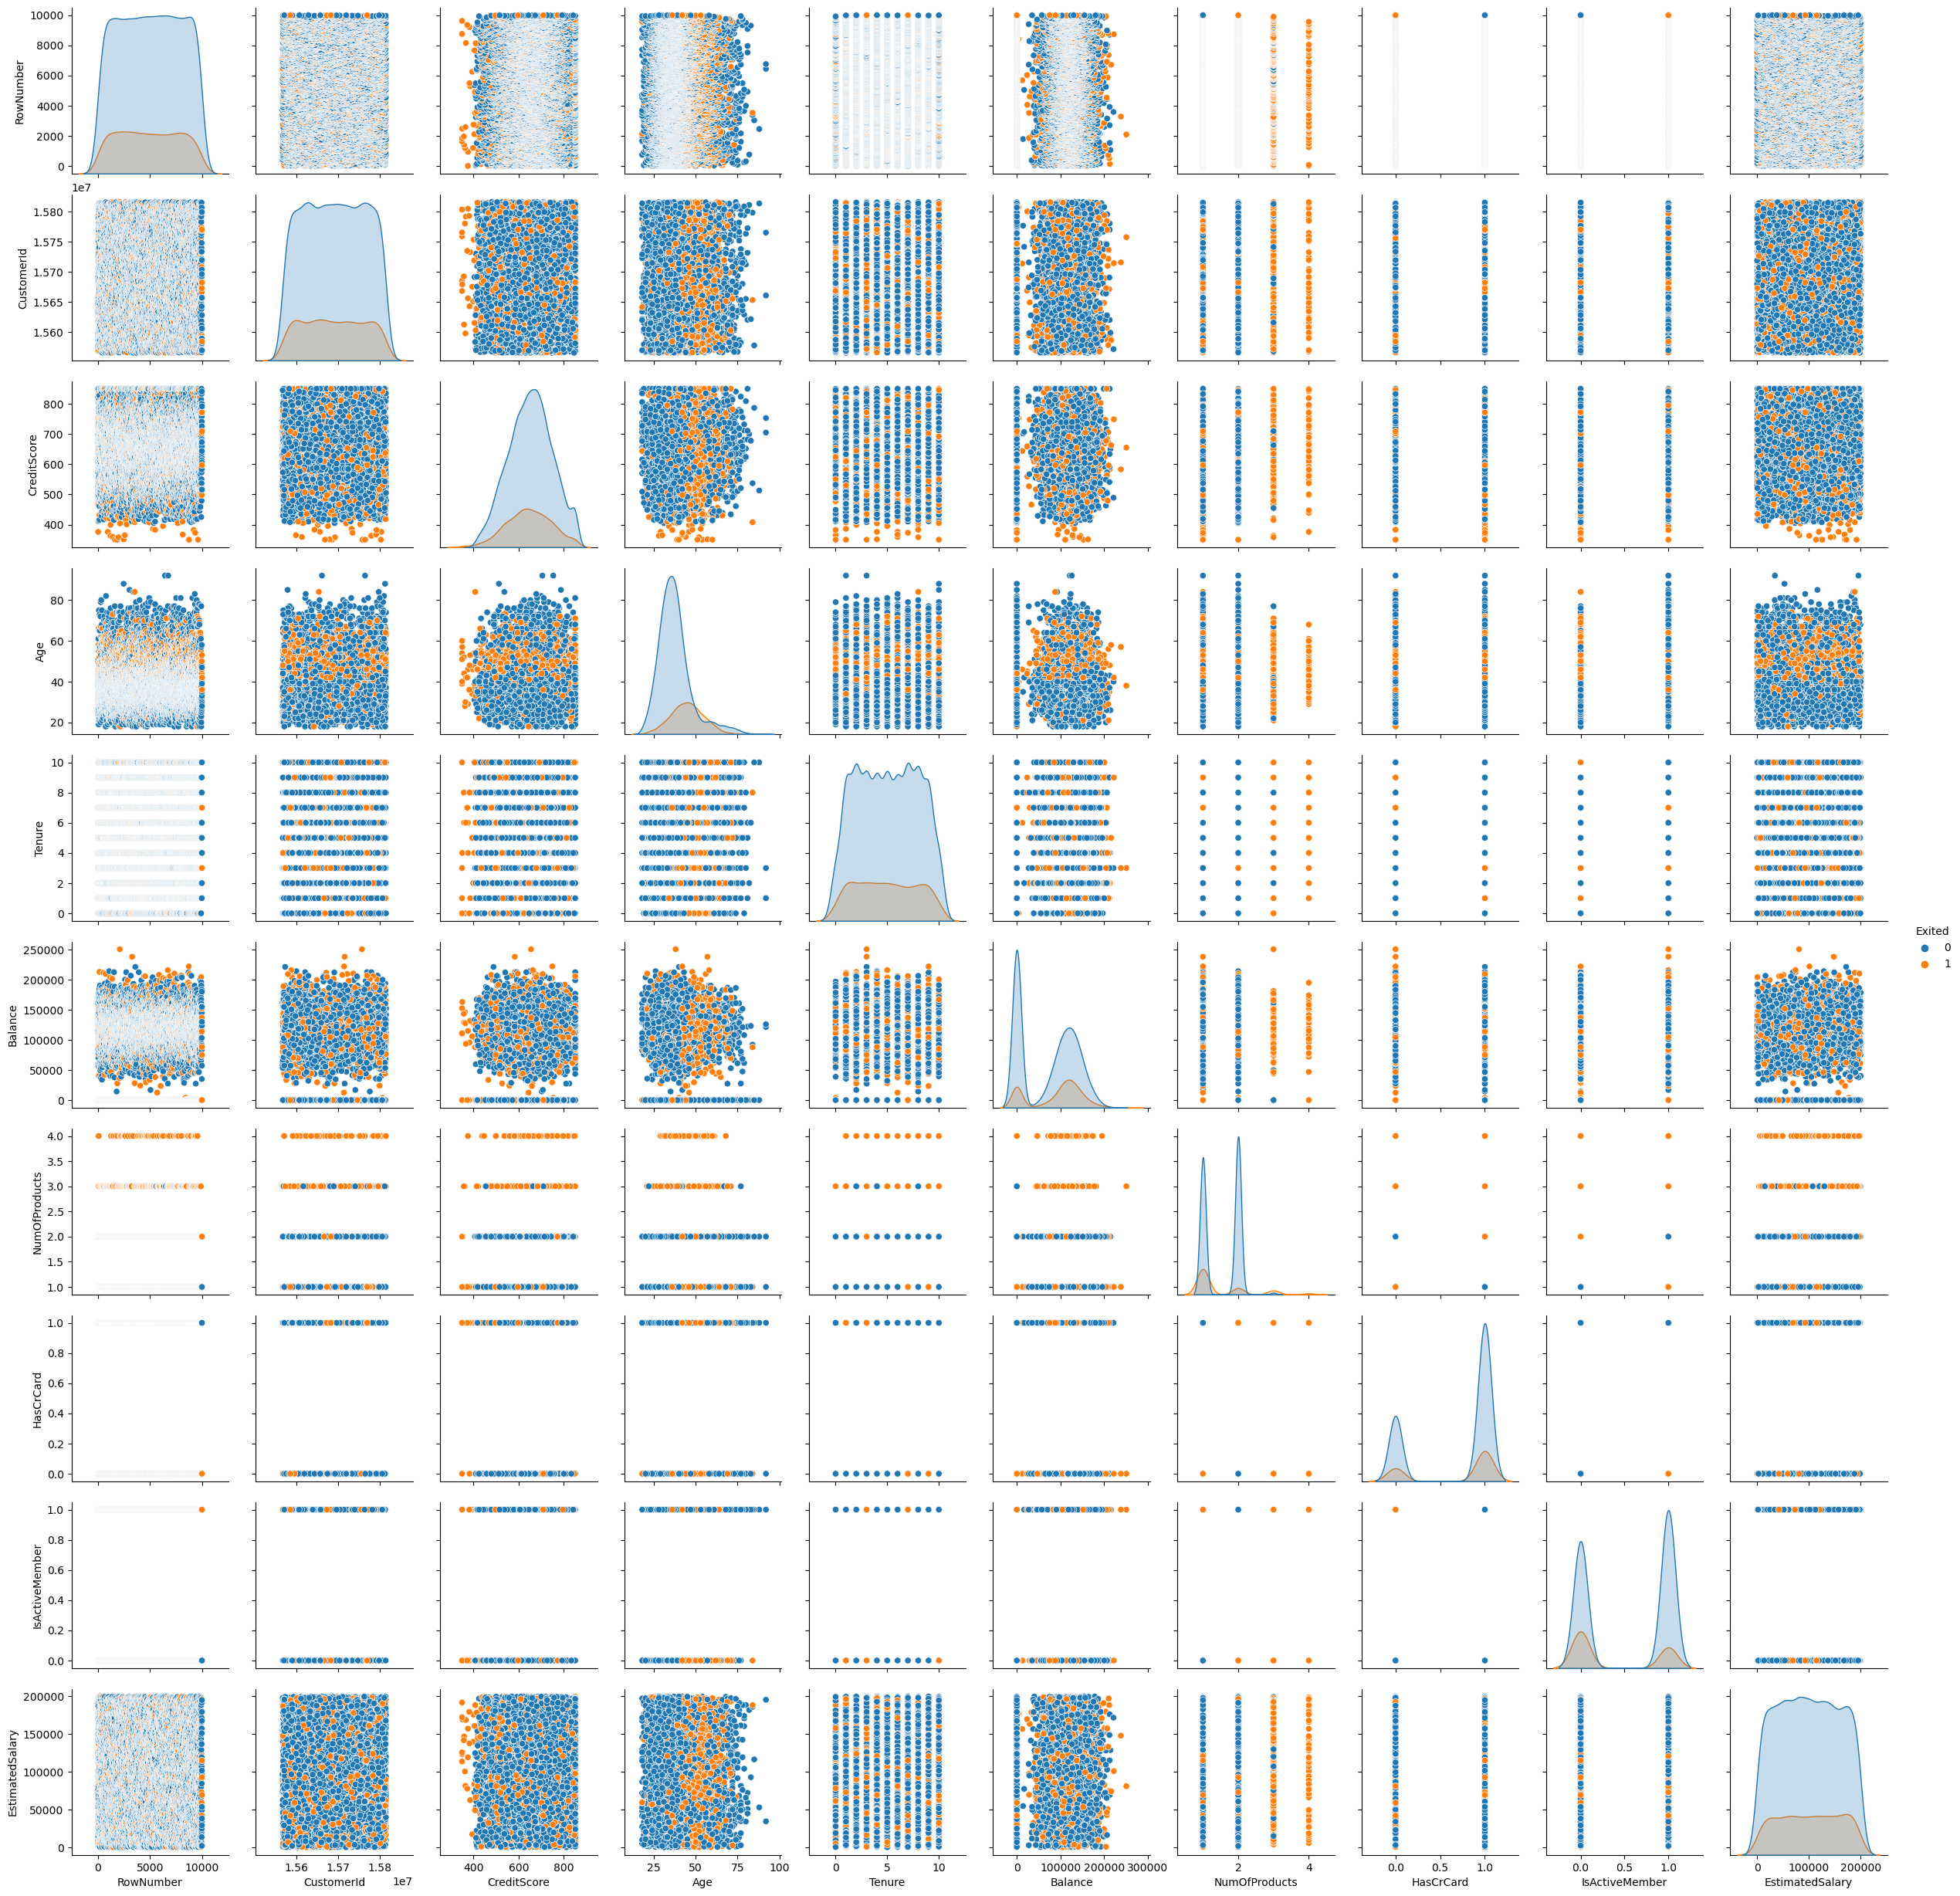

In [32]:
sns.pairplot(customer_data.drop(["Surname","Geography","Gender"],axis=1,),hue="Exited")

In [29]:
customer_data["Exited"]   #TRAGET VALUES

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## CLASSIFIER_MODEL

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [34]:
from sklearn.model_selection import train_test_split

In [44]:
customer_data     #data for prediction and classification 

RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
0             1    15634602          619   42       2       0.00   
1             2    15647311          608   41       1   83807.86   
2             3    15619304          502   42       8  159660.80   
3             4    15701354          699   39       1       0.00   
4             5    15737888          850   43       2  125510.82   
...         ...         ...          ...  ...     ...        ...   
9995       9996    15606229          771   39       5       0.00   
9996       9997    15569892          516   35      10   57369.61   
9997       9998    15584532          709   36       7       0.00   
9998       9999    15682355          772   42       3   75075.31   
9999      10000    15628319          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0                 1          1               1        101348.88       1  
1                 1          0               1        112542.58       0  
2                 3          1               0        113931.57       1  
3                 2          0               0         93826.63       0  
4                 1          1               1         79084.10       0  
...             ...        ...             ...              ...     ...  
9995              2          1               0         96270.64       0  
9996              1          1               1        101699.77       0  
9997              1          0               1         42085.58       1  
9998              2          1               0         92888.52       1  
9999              1          1               0         38190.78       0  

[10000 rows x 11 columns]

In [46]:
X = customer_data.drop("Exited",axis=1)
y = customer_data["Exited"]


In [47]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## LOGISTIC REGRESSION 

In [48]:
logmodel = LogisticRegression()
logmodel = logmodel.fit(X_train,y_train)

In [49]:
logmodel

LogisticRegression()

In [50]:
prediction_LR = logmodel.predict(X_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [52]:
print(confusion_matrix(y_test,prediction_LR))
print("\n")

print(classification_report(y_test,prediction_LR))

[[2620    0]
 [ 680    0]]


              precision    recall  f1-score   support

           0       0.79      1.00      0.89      2620
           1       0.00      0.00      0.00       680

    accuracy                           0.79      3300
   macro avg       0.40      0.50      0.44      3300
weighted avg       0.63      0.79      0.70      3300



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LR model accuracy

In [54]:
print(accuracy_score(y_test,prediction_LR))

0.793939393939394


## RANDOM_FOREST

In [55]:
rfc = RandomForestClassifier(n_estimators=200)

In [56]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [57]:
rfc_pred = rfc.predict(X_test)

In [58]:
print(confusion_matrix(y_test,rfc_pred))
print("\n")

print(classification_report(y_test,rfc_pred))

[[2531   89]
 [ 379  301]]


              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2620
           1       0.77      0.44      0.56       680

    accuracy                           0.86      3300
   macro avg       0.82      0.70      0.74      3300
weighted avg       0.85      0.86      0.84      3300



## RF model accuracy

In [59]:
print(accuracy_score(y_test,rfc_pred))

0.8581818181818182


In [61]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

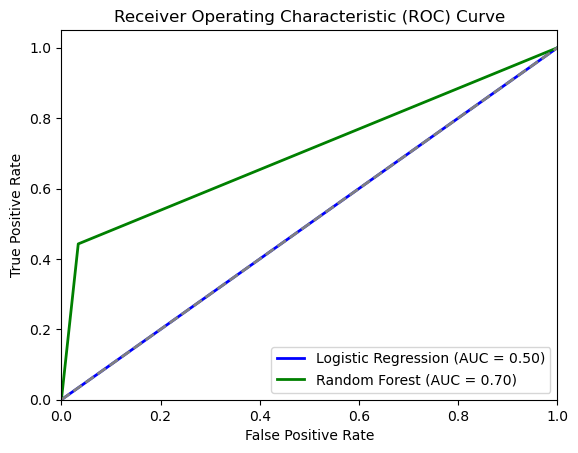

In [63]:

fpr_lr, tpr_lr, _ = roc_curve(y_test,prediction_LR)
roc_auc_lr = auc(fpr_lr, tpr_lr)


fpr_rf, tpr_rf, _ = roc_curve(y_test, rfc_pred )
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

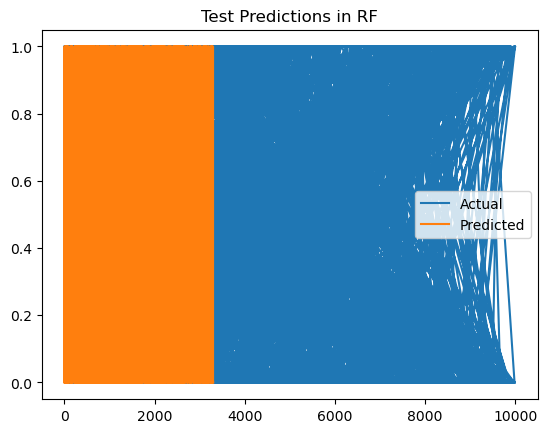

In [67]:
plt.plot(y_test, label='Actual')
plt.plot(rfc_pred, label='Predicted')
plt.title('Test Predictions in RF')
plt.legend()
plt.show()

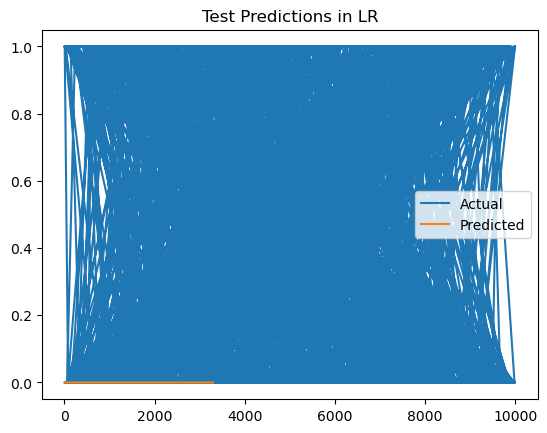

In [66]:
plt.plot(y_test, label='Actual')
plt.plot(prediction_LR, label='Predicted')
plt.title('Test Predictions in LR')
plt.legend()
plt.show()